# Visualise the pre-trained agent in action

Modify the path to the weights and run the notebook.

In [1]:
WEIGHTS = './weights-5000'  # NB: without '.pth'
METRICS = './metrics.csv'

In [2]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

from upload.agent import VisionDeepQ

sys.path.append('../')
from utilities import visualisation  # noqa

## Parameters

In [ ]:
network = {
    "input_channels": 6, "outputs": 5,
    "channels": [32, 32, 32],
    "kernels": [7, 5, 3],
    "padding": ["same", "same", "same"],
    "strides": [],
    "nodes": [],
}
optimizer = {
    "optimizer": torch.optim.RMSprop,
    "lr": 0.001,
    "hyperparameters": {}
}
shape = {
    "original": (1, 1, 210, 160),

    "height": slice(27, 203),
    "width": slice(22, 64),
    "max_pooling": 2,
}
skip = 4

## Setup

In [ ]:
value_agent = VisionDeepQ(
    network=network, optimizer=optimizer, shape=shape,
    exploration_rate=1.0,
)

weights = torch.load(f'{WEIGHTS}.pth', map_location=torch.device('cpu'))
value_agent.load_state_dict(weights)

environment = gym.make('ALE/Tetris-v5', render_mode="rgb_array",
                       obs_type="grayscale", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

## Visualise

### Plotting the metrics from the csv-file created during training.

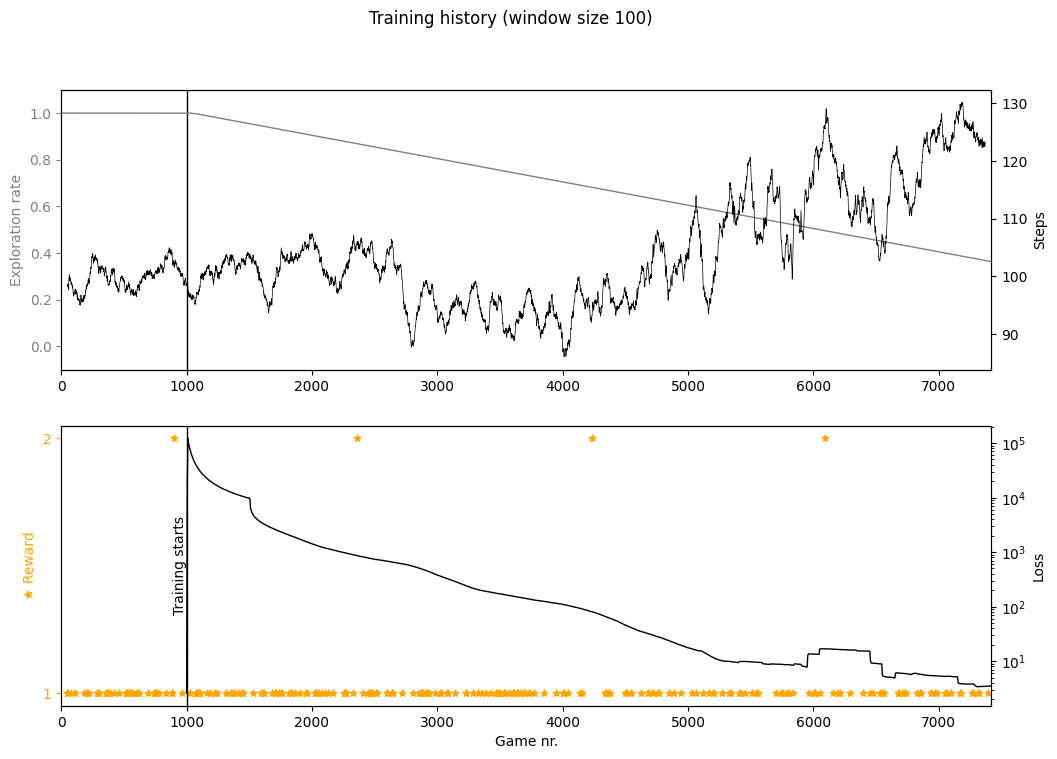

In [3]:
visualisation.graph(METRICS, title="Training history", window=100) if METRICS else None
plt.show() if METRICS else None

### Creating and saving a gif of the agent in action. The gif will be saved to the given path.

In [ ]:
visualisation.gif(environment, value_agent, f'./{WEIGHTS}.gif', skip)